In [30]:
#Import libraries that will be used in the project
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
import csv
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pickle
from jupyter_datatables import init_datatables_mode

In [31]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [32]:
#load the dataset
loan_data = pd.read_csv('../datasets/loan_data_clean.csv')

In [33]:
loan_data

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0.0,0,0,125,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3.0,0,0,275,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1.0,0,0,431,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2.0,0,0,422,0.0,187.000000,360.0,1.0,2,1


<Figure size 720x720 with 0 Axes>

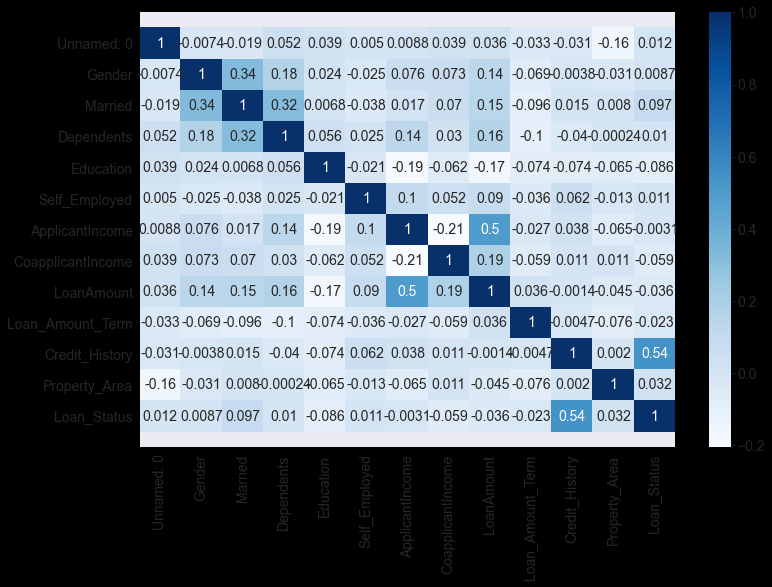

In [34]:
cor_mat = loan_data.corr()
feature_corr = cor_mat.index
plt.figure(figsize=(10,10))
f, ax= plt.subplots(figsize=(12,8))

g = sns.heatmap(loan_data[feature_corr].corr(), annot=True, cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [35]:
x_df = loan_data.drop(columns= ['CoapplicantIncome', 'Gender', 'Married', 'Education', 'Property_Area', 'Dependents', 'Loan_Amount_Term'])

<Figure size 720x720 with 0 Axes>

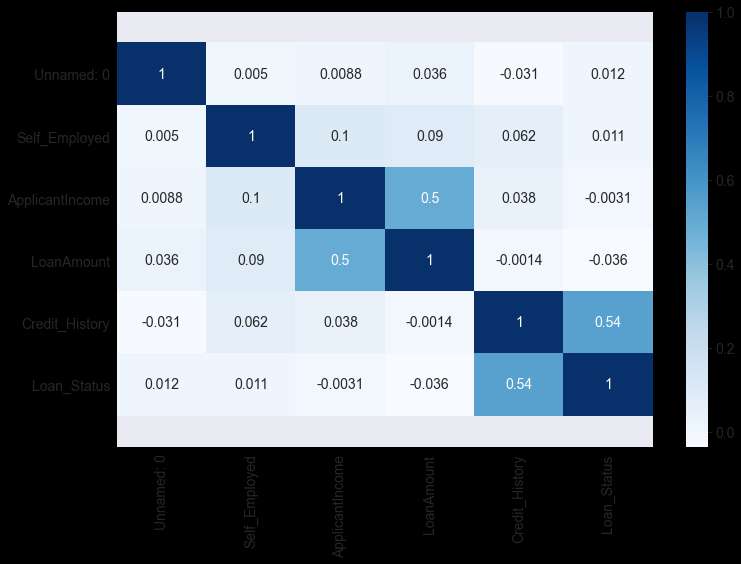

In [36]:
cor_mat = x_df.corr()
feature_corr = cor_mat.index
plt.figure(figsize=(10,10))
f, ax= plt.subplots(figsize=(12,8))

g = sns.heatmap(x_df[feature_corr].corr(), annot=True, cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [37]:
x = x_df.drop(columns=['Loan_Status'])
y = x_df['Loan_Status']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=30)

In [39]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(185,)

In [40]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [61]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(x_train_scaled, y_train)

SVC(C=0.01, kernel='linear', random_state=1)

In [62]:
predictions = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy = {:.3f}%'.format(accuracy*100))

Accuracy = 80.000%
